In [2]:
using RegularizedSystems
using VSTom
using PyPlot

In [3]:
using NetCDF
function sawtooth_analysis{T<:Real}(energy::Array{T,1},pitch::Array{T,1},b::RegularizedSolution,a::RegularizedSolution;filename=Void)
    dE = abs(energy[2]-energy[1])
    dP = abs(pitch[2]-pitch[1])
    nenergy = length(energy)
    npitch = length(pitch)
    dens_a = sum(max(a.x,0))
    dens_err_a = norm(a.sigma)
    x_a = reshape(max(a.x,0),npitch,nenergy)/(dE*dP)
    err_a = reshape(a.sigma,npitch,nenergy)/(dE*dP)
    reg_err_a = reshape(a.reg_err,npitch,nenergy)/(dE*dP)
    dens_p_a = sum(x_a,2)*dE
    dens_p_err_a = sqrt(sum(err_a.^2,2))*dE
    
    dens_b = sum(max(b.x,0))
    dens_err_b = norm(b.sigma)
    x_b = reshape(max(b.x,0),npitch,nenergy)/(dE*dP)
    err_b = reshape(b.sigma,npitch,nenergy)/(dE*dP)
    reg_err_b = reshape(b.reg_err,npitch,nenergy)/(dE*dP)
    dens_p_b = sum(x_b,2)*dE
    dens_p_err_b = sqrt(sum(err_b.^2,2))*dE
    
    a_over_b = reshape(dens_p_a./dens_p_b,npitch)
    a_over_b_err = reshape(abs(a_over_b) .* sqrt((dens_p_err_a./dens_p_a).^2 .+ (dens_p_err_b./dens_p_b).^2),npitch)
    
    errorbar(pitch,a_over_b,a_over_b_err)
    aob_x = x_a./x_b
    aob_err = abs(aob_x) .* sqrt((err_a./x_a).^2 .+ (err_b./x_b).^2)

    if filename != Void
        
        isfile(filename) && rm(filename)
        
        e_id = NetCDF.NcDim("nenergy",nenergy)
        p_id = NetCDF.NcDim("npitch",npitch)
        one_id = NetCDF.NcDim("scaler",1)
        
        e_varid = NetCDF.NcVar("energy",e_id)
        p_varid = NetCDF.NcVar("pitch",p_id)
        xa_varid = NetCDF.NcVar("x_after",[p_id,e_id])
        xb_varid = NetCDF.NcVar("x_before",[p_id,e_id])
        erra_varid = NetCDF.NcVar("err_after",[p_id,e_id])
        errb_varid = NetCDF.NcVar("err_before",[p_id,e_id])
        reg_erra_varid = NetCDF.NcVar("reg_err_after",[p_id,e_id])
        reg_errb_varid = NetCDF.NcVar("reg_err_before",[p_id,e_id])
        ratio2d_varid = NetCDF.NcVar("dist_ratio",[p_id,e_id])
        ratio1d_varid = NetCDF.NcVar("pitch_ratio",p_id)
        ratio2d_err_varid = NetCDF.NcVar("dist_ratio_err",[p_id,e_id])
        ratio1d_err_varid = NetCDF.NcVar("pitch_ratio_err",p_id)
        dens_a_varid = NetCDF.NcVar("dens_after",one_id)
        dens_err_a_varid = NetCDF.NcVar("dens_err_after",one_id)
        dens_b_varid = NetCDF.NcVar("dens_before",one_id)
        dens_err_b_varid = NetCDF.NcVar("dens_err_before",one_id)
        
        ncid = NetCDF.create(filename,[e_varid,p_varid,xa_varid,xb_varid,erra_varid,errb_varid,
            reg_erra_varid,reg_errb_varid,ratio2d_varid,ratio1d_varid, ratio2d_err_varid,ratio1d_err_varid,
            dens_a_varid,dens_err_a_varid,dens_b_varid,dens_err_b_varid], mode = NC_CLASSIC_MODEL)
        
        NetCDF.putvar(ncid,"energy",energy)
        NetCDF.putvar(ncid,"pitch",pitch)
        NetCDF.putvar(ncid,"x_after",x_a)
        NetCDF.putvar(ncid,"err_after",err_a)
        NetCDF.putvar(ncid,"reg_err_after",reg_err_a)
        NetCDF.putvar(ncid,"dens_after",[dens_a])
        NetCDF.putvar(ncid,"dens_err_after",[dens_err_a])
        NetCDF.putvar(ncid,"x_before",x_b)
        NetCDF.putvar(ncid,"err_before",err_b)
        NetCDF.putvar(ncid,"reg_err_before",reg_err_b)
        NetCDF.putvar(ncid,"dens_before",[dens_b])
        NetCDF.putvar(ncid,"dens_err_before",[dens_err_b])
        NetCDF.putvar(ncid,"dist_ratio",aob_x)
        NetCDF.putvar(ncid,"dist_ratio_err",aob_err)
        NetCDF.putvar(ncid,"pitch_ratio",a_over_b)
        NetCDF.putvar(ncid,"pitch_ratio_err",a_over_b_err)
        
        NetCDF.close(ncid)
    end
end

sawtooth_analysis (generic function with 1 method)

In [3]:
true_dist = read_ncdf("data/true_sawtooth_distributions.cdf");

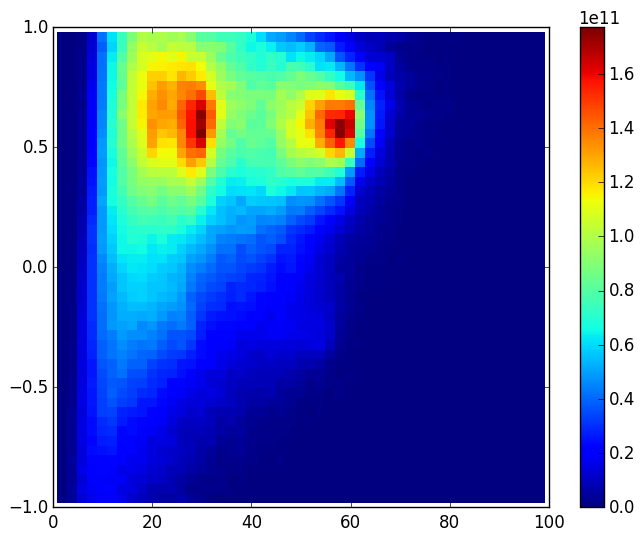

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa8c0aaef60>

In [78]:
pcolor(energy_full,pitch_full,true_dist["TRANSP_before"])
colorbar()

In [5]:
data_b = read_ncdf("data/before_sawtooth_data.cdf")
data_a = read_ncdf("data/after_sawtooth_data.cdf")

Dict{String,Any} with 6 entries:
  "transfer_matrix" => [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0…
  "pitch"           => [-0.9800000190734863,-0.9399999976158142,-0.899999976158…
  "error"           => [1.072339450068992e15,1.070765076119552e15,1.04594318504…
  "spectra"         => [5.97170105352192e14,1.068641550336e15,-4.43398464995328…
  "dw"              => [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0…
  "energy"          => [1.0,3.0,5.0,7.0,9.0,11.0,13.0,15.0,17.0,19.0,21.0,23.0,…

In [73]:
nenergy = 20
npitch = 20

spec_b = data_b["spectra"]
err_b = data_b["error"]
spec_a = data_a["spectra"]
err_a = data_a["error"]

A_b_full = data_b["transfer_matrix"]
A_a_full = data_a["transfer_matrix"]
dw_full = data_b["dw"]

energy_full = data_b["energy"]
pitch_full = data_b["pitch"]
dE_full = abs(energy_full[2] - energy_full[1])
dP_full = abs(pitch_full[2] - pitch_full[1])

energy = linspace(20.0,maximum(energy_full),nenergy)
pitch = linspace(extrema(pitch_full)...,npitch)
dE = abs(energy[2]-energy[1])
dP = abs(pitch[2]-pitch[1])

A_b = resize_transfer_matrix(A_b_full,energy_full,pitch_full,energy,pitch)
A_a = resize_transfer_matrix(A_a_full,energy_full,pitch_full,energy,pitch)
dw = resize_transfer_matrix(dw_full,energy_full,pitch_full,energy,pitch);

#TSVD

In [83]:
nr,nc = size(A_a)
num=25
x_a_samples = zeros(nc,num)
x_b_samples = zeros(nc,num)
for i=1:num
    rA_b = A_b .+ dw.*randn(size(A_b)...)
    rA_a = A_a .+ dw.*randn(size(A_a)...)
    rspec_b = spec_b .+ .01*err_b.*randn(size(spec_b)...)
    rspec_a = spec_a .+ .01*err_a.*randn(size(spec_a)...)

    tsvd_before = TSVDFunctional(rA_b,rspec_b,err_b);
    tsvd_after  = TSVDFunctional(rA_a,rspec_a,err_a);
    k_before = discrete_lcurve(tsvd_before,55:75,nseeds=20)
    k_after = discrete_lcurve(tsvd_after,55:75,nseeds=20)
    sol_b = minimize(tsvd_before,k_before)
    sol_a = minimize(tsvd_after,k_after)
    x_b_samples[:,i] = max(sol_b.x,0)/(dE*dP)
    x_a_samples[:,i] = max(sol_a.x,0)/(dE*dP)
end

In [84]:
dE*dP

0.42891967593798

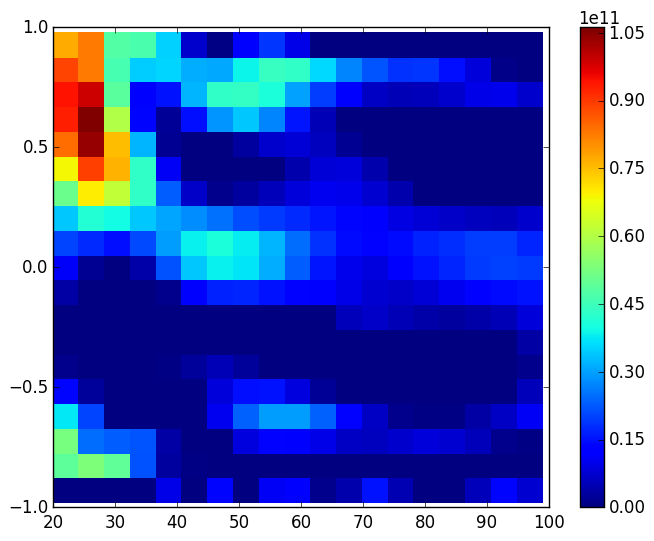

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa8c0829208>

In [82]:
pcolor(energy,pitch,reshape(mean(x_a_samples,2),20,20)/(4*pi))
colorbar()

#Zeroth Order Tikhonov

In [94]:
nr,nc = size(A_a)
num=25
x_a_samples = zeros(nc,num)
x_b_samples = zeros(nc,num)
for i=1:num
    rA_b = A_b .+ 0*dw.*randn(size(A_b)...)
    rA_a = A_a .+ 0*dw.*randn(size(A_a)...)
    rspec_b = spec_b .+ 0*err_b.*randn(size(spec_b)...)
    rspec_a = spec_a .+ 0*err_a.*randn(size(spec_a)...)

    tik0_before = TikhonovFunctional(rA_b,rspec_b,err_b,(eye(nc),));
    tik0_after  = TikhonovFunctional(rA_a,rspec_a,err_a,(eye(nc),));
    alpha_before = lcurve(tik0_before,log_alpha_range=(-10,5),nseeds=20)
    alpha_after = lcurve(tik0_after,log_alpha_range=(-10,5),nseeds=20)
    println(i," ",alpha_before," ",alpha_after)
    sol_b = minimize(tik0_before,alpha_before)
    sol_a = minimize(tik0_after,alpha_after)
    x_b_samples[:,i] = max(sol_b.x,0)/(dE*dP)
    x_a_samples[:,i] = max(sol_a.x,0)/(dE*dP)
end

1 0.30934024584428377 0.5216612220523604
2 0.30934024584428377 0.5216612220523604
3 0.30934024584428377 0.5216612220523604
4 0.30934024584428377 0.5216612220523604
5 0.30934024584428377 0.5216612220523604
6 0.30934024584428377 0.5216612220523604
7 0.30934024584428377 0.5216612220523604
8 0.30934024584428377 0.5216612220523604
9 0.30934024584428377 0.5216612220523604
10 0.30934024584428377 0.5216612220523604
11 0.30934024584428377 0.5216612220523604
12 0.30934024584428377 0.5216612220523604
13 0.30934024584428377 0.5216612220523604
14 0.30934024584428377 0.5216612220523604
15 0.30934024584428377 0.5216612220523604
16 0.30934024584428377 0.5216612220523604
17 0.30934024584428377 0.5216612220523604
18 0.30934024584428377 0.5216612220523604
19 0.30934024584428377 0.5216612220523604
20 0.30934024584428377 0.5216612220523604
21 0.30934024584428377 0.5216612220523604
22 0.30934024584428377 0.5216612220523604
23 0.30934024584428377 0.5216612220523604
24 0.30934024584428377 0.5216612220523604
2

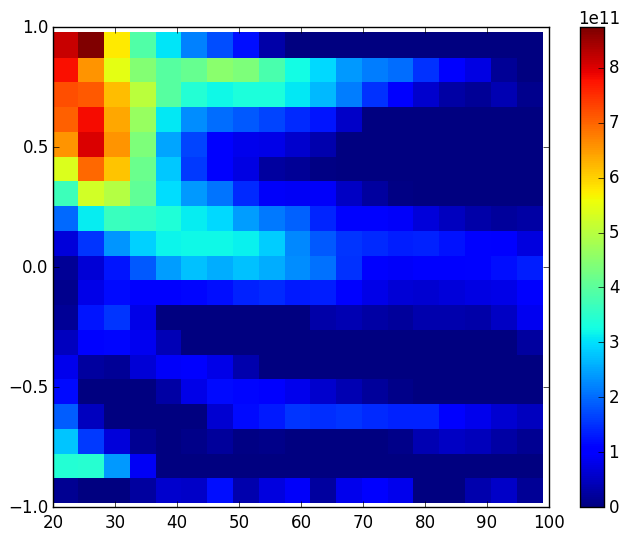

PyObject <matplotlib.colorbar.Colorbar object at 0x7fa8be125048>

In [96]:
pcolor(energy,pitch,reshape(mean(x_a_samples,2),20,20))
colorbar()

In [24]:
nr,nc = size(A_b)
tik0_before = TikhonovFunctional(A_b,b_b,(eye(nc),));
tik0_after = TikhonovFunctional(A_a,b_a,(eye(nc),));

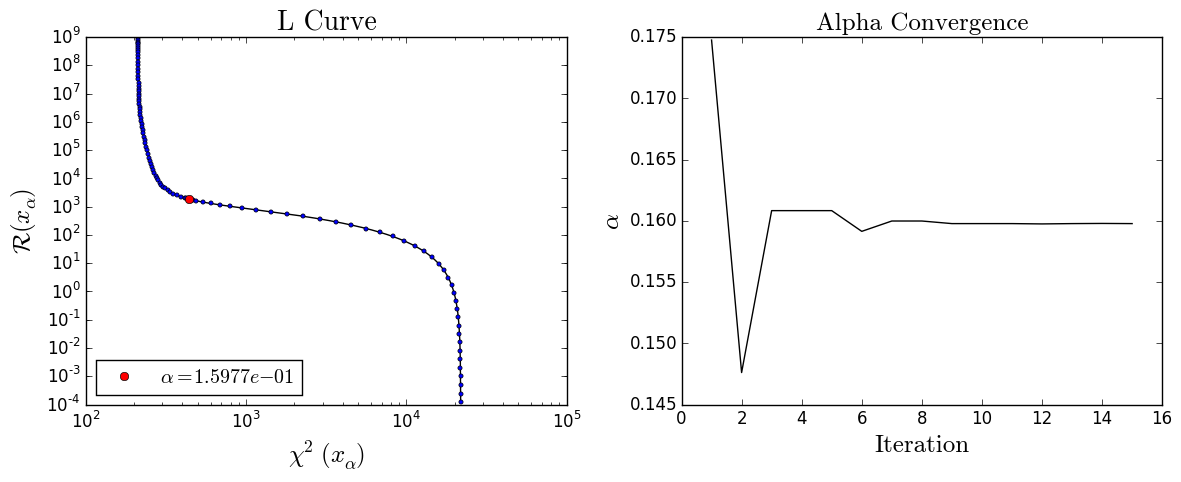

0.1597697577696803

In [25]:
alpha_before = lcurve(tik0_before;log_alpha_range=(-10,5),nseeds=100,doplot=true)

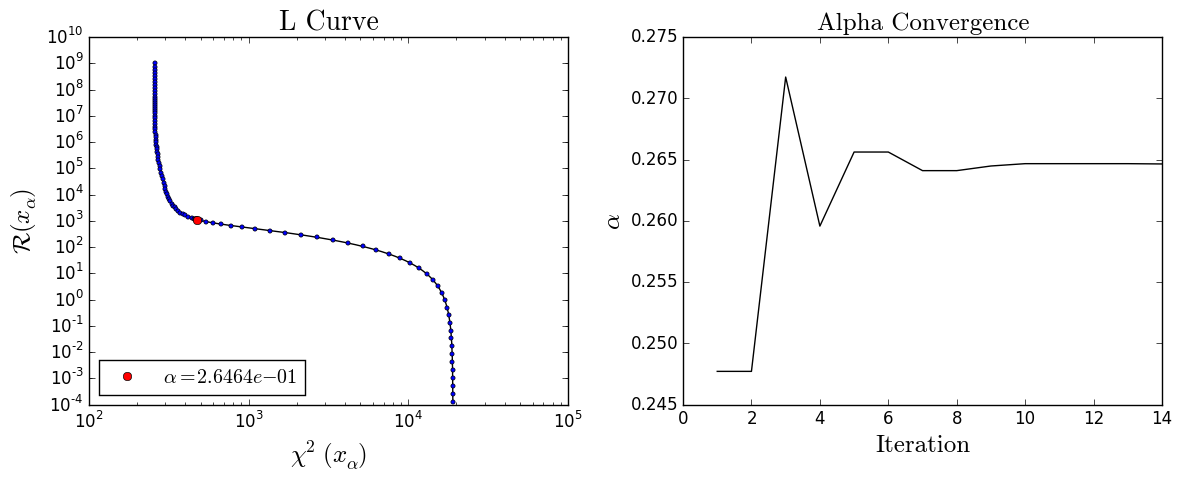

0.2646380650711646

In [26]:
alpha_after = lcurve(tik0_after;log_alpha_range=(-10,5),nseeds=100,doplot=true)

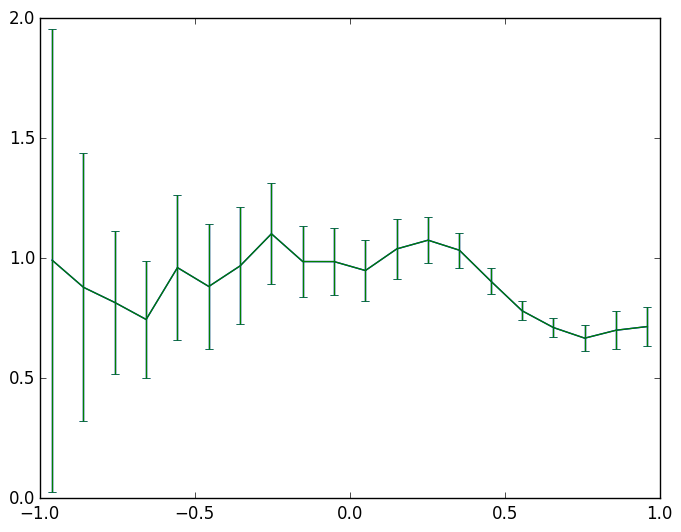

65536

In [27]:
tik0_sol_before = minimize(tik0_before,alpha_before,true_sol=true_b*dE*dP)
tik0_sol_after = minimize(tik0_after,alpha_after,true_sol=true_a*dE*dP);

tik0_sol_before_cut = minimize(tik0_before,alpha_before,true_sol=true_b_cut*dE*dP)
tik0_sol_after_cut = minimize(tik0_after,alpha_after,true_sol=true_a_cut*dE*dP);

sawtooth_analysis(energy,pitch,tik0_sol_before,tik0_sol_after,filename="data/sawtooth_tik0.cdf")
sawtooth_analysis(energy,pitch,tik0_sol_before_cut,tik0_sol_after_cut,filename="data/sawtooth_tik0_cut.cdf")

In [28]:
L1E,L1p = gradEP(energy,pitch)
nr,nc = size(A_b)
tik1_before = TikhonovFunctional(A_b,b_b,(L1E,L1p));
tik1_after = TikhonovFunctional(A_a,b_a,(L1E,L1p));

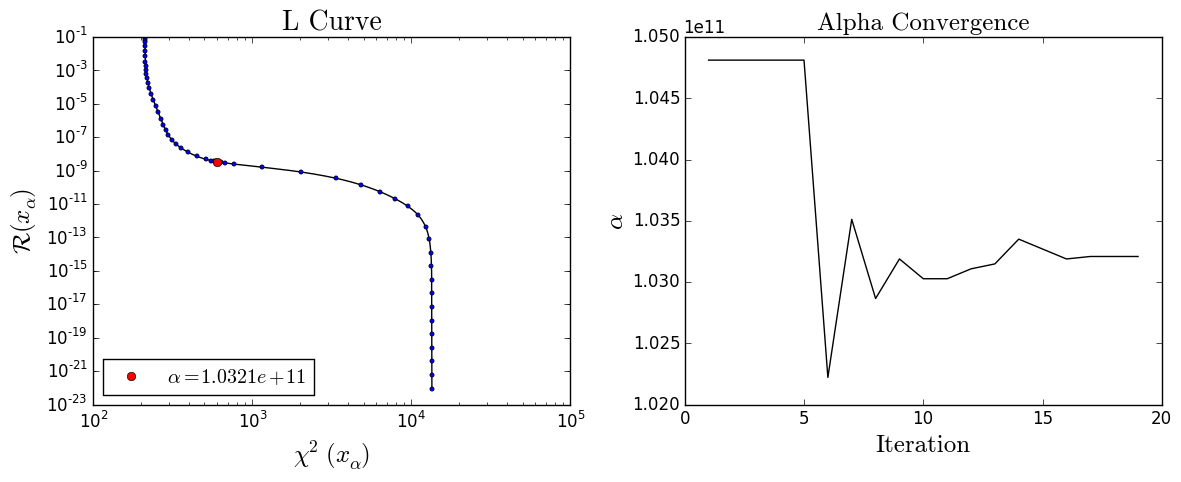

1.0320859523852159e11

In [29]:
alpha_before = lcurve(tik1_before;log_alpha_range=(0,20),nseeds=50,doplot=true)

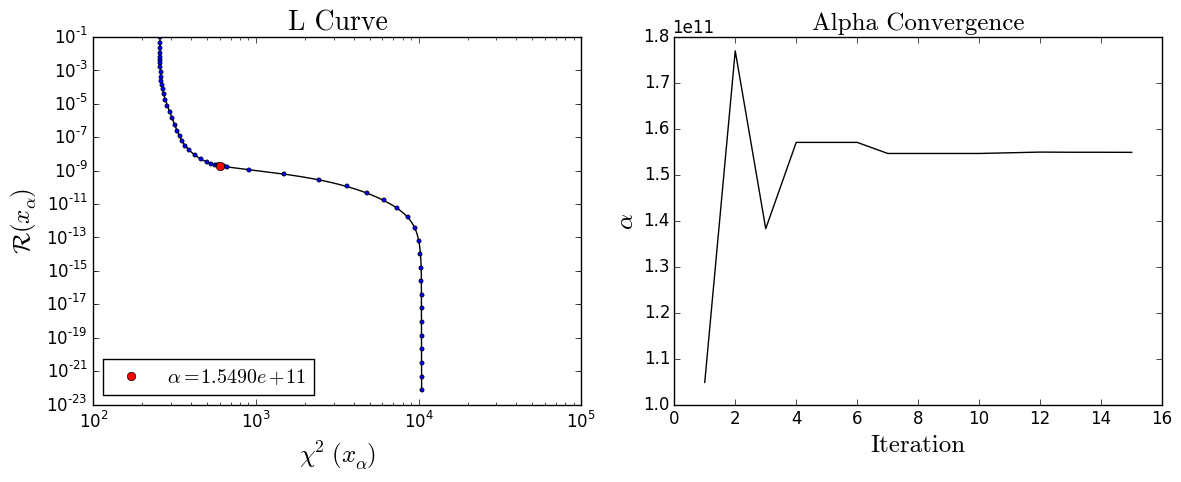

1.5489527152063535e11

In [30]:
alpha_after = lcurve(tik1_after;log_alpha_range=(0,20),nseeds=50,doplot=true)

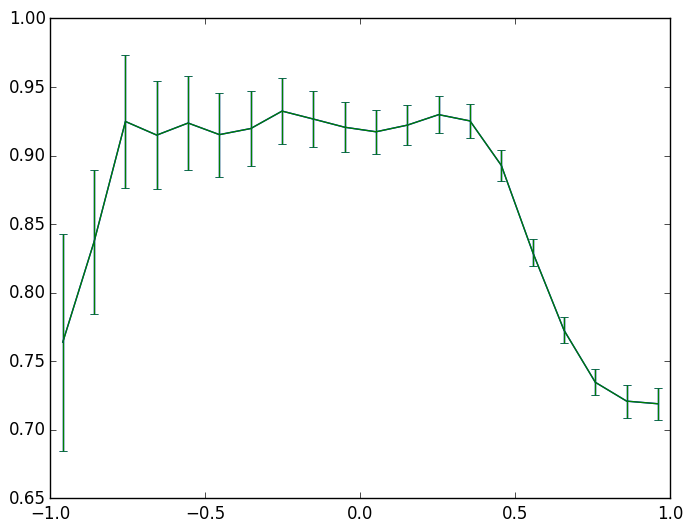

65536

In [31]:
tik1_sol_before = minimize(tik1_before,alpha_before,true_sol=true_b*dE*dP)
tik1_sol_after = minimize(tik1_after,alpha_after,true_sol=true_a*dE*dP);

tik1_sol_before_cut = minimize(tik1_before,alpha_before,true_sol=true_b_cut*dE*dP)
tik1_sol_after_cut = minimize(tik1_after,alpha_after,true_sol=true_a_cut*dE*dP);

sawtooth_analysis(energy,pitch,tik1_sol_before,tik1_sol_after,filename="data/sawtooth_tik1.cdf")
sawtooth_analysis(energy,pitch,tik1_sol_before_cut,tik1_sol_after_cut,filename="data/sawtooth_tik1_cut.cdf")

In [32]:
L1E,L1p = gradEP(energy,pitch)
nr,nc = size(A_b)
mf_before = FisherFunctional(A_b,b_b,(L1E,L1p));
mf_after = FisherFunctional(A_a,b_a,(L1E,L1p));

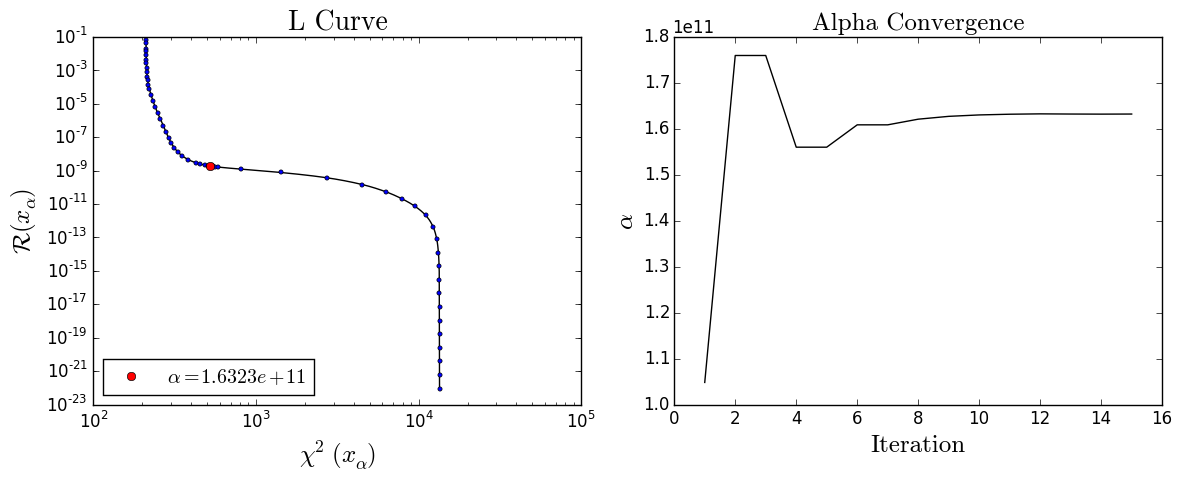

1.6323361882267474e11

In [33]:
alpha_before = lcurve(mf_before;log_alpha_range=(0,20),nseeds=50,doplot=true)

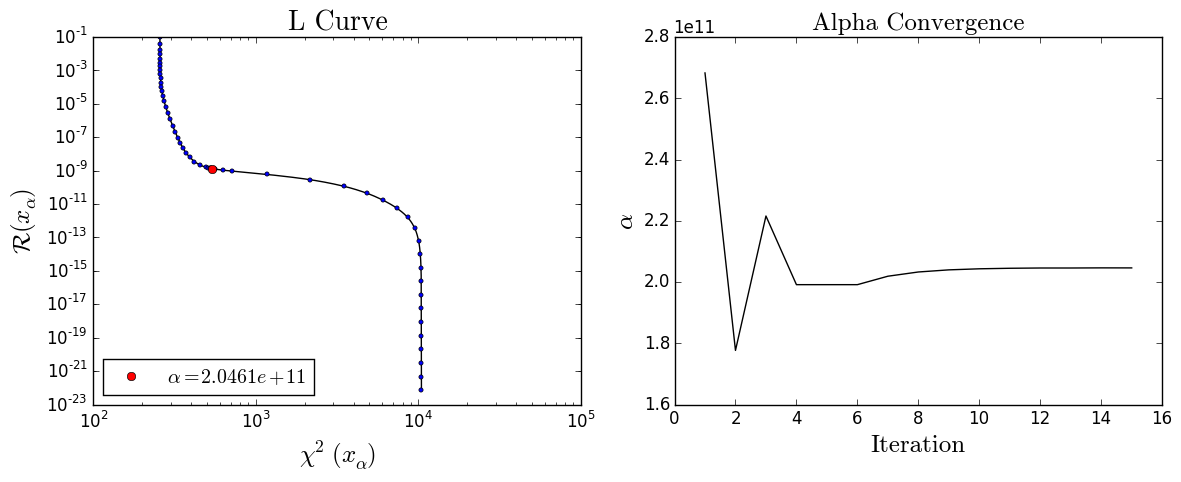

2.046130338417798e11

In [34]:
alpha_after = lcurve(mf_after;log_alpha_range=(0,20),nseeds=50,doplot=true)

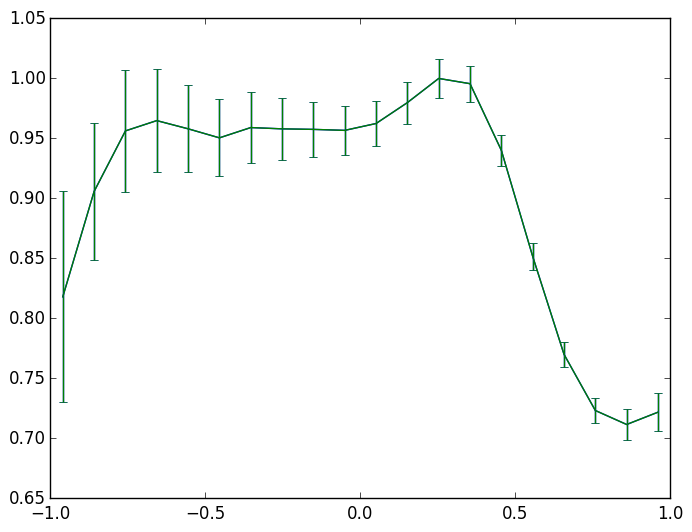

65536

In [35]:
mf_sol_before = minimize(mf_before,alpha_before,true_sol=true_b*dE*dP)
mf_sol_after = minimize(mf_after,alpha_after,true_sol=true_a*dE*dP);

mf_sol_before_cut = minimize(mf_before,alpha_before,true_sol=true_b_cut*dE*dP)
mf_sol_after_cut = minimize(mf_after,alpha_after,true_sol=true_a_cut*dE*dP);

sawtooth_analysis(energy,pitch,mf_sol_before,mf_sol_after,filename="data/sawtooth_mf.cdf")
sawtooth_analysis(energy,pitch,mf_sol_before_cut,mf_sol_after_cut,filename="data/sawtooth_mf_cut.cdf")

In [36]:
me_before = EntropyFunctional(A_b,b_b;Ascale=1e4);
me_after = EntropyFunctional(A_a,b_a;Ascale=1e4);


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************



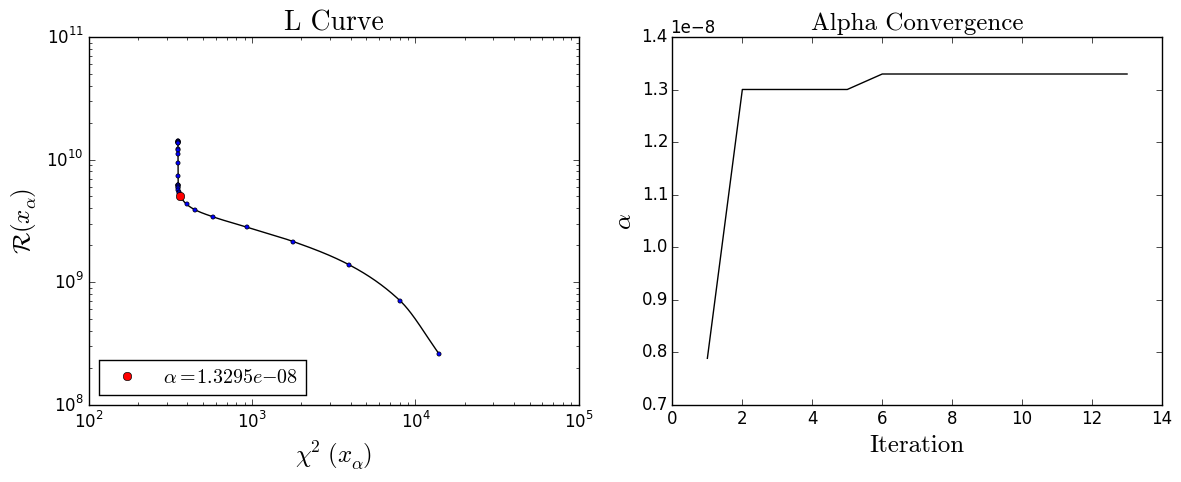

1.329547111188615e-8

In [37]:
alpha_before = lcurve(me_before;log_alpha_range=(-15,-5),nseeds=30,doplot=true)

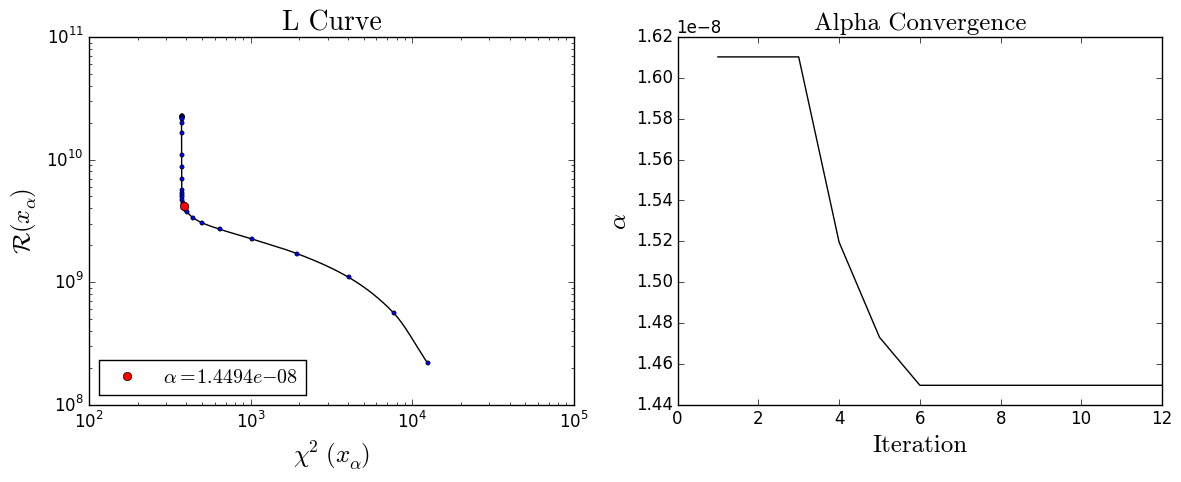

1.449423111987147e-8

In [38]:
alpha_after = lcurve(me_after;log_alpha_range=(-14,-5),nseeds=30,doplot=true)

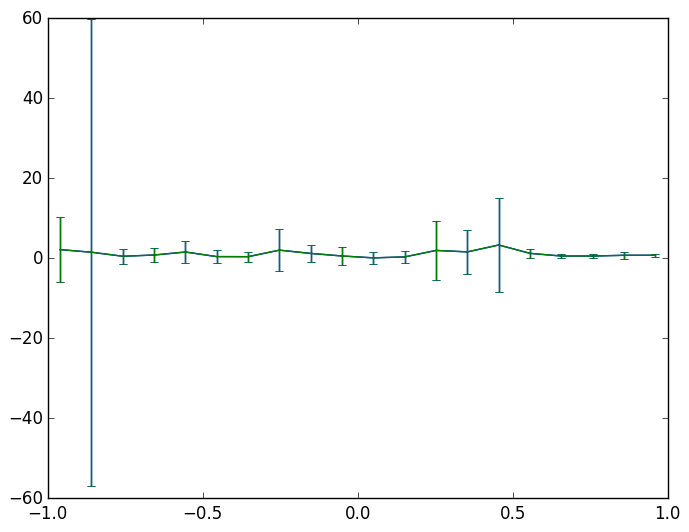

65536

In [39]:
me_sol_before = minimize(me_before,alpha_before,true_sol=true_b*dE*dP)
me_sol_after = minimize(me_after,alpha_after,true_sol=true_a*dE*dP);

me_sol_before_cut = minimize(me_before,alpha_before,true_sol=true_b_cut*dE*dP)
me_sol_after_cut = minimize(me_after,alpha_after,true_sol=true_a_cut*dE*dP);

sawtooth_analysis(energy,pitch,me_sol_before,me_sol_after,filename="data/sawtooth_me.cdf")
sawtooth_analysis(energy,pitch,me_sol_before_cut,me_sol_after_cut,filename="data/sawtooth_me_cut.cdf")